In [1]:
!nvidia-smi

Sat Apr 12 20:43:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## ON-LINE demo for SOFI

Hi 😀. This is the official notebook to use SOFI.

Here, you will find info about:


1.   Installation
2.   How to call and use SOFI

**Notes:**
*   We currently support only SOFI model.
*   We require GPU to execute the SOFI.
*   Change your runtime type to GPU.


## Installation

In the moment of installing the *MultiScaleDeformableAttention* module, you will observe many warnings.

Simply ignore them.

In [1]:
import os
HOME = os.getcwd()
print(HOME)
import os
# os.environ["CXXFLAGS"] = "-D_GLIBCXX_USE_CXX11_ABI=1"

/content


In [2]:
%cd {HOME}
!git clone https://github.com/SebastianJanampa/SOFI.git
%cd {HOME}/SOFI

/content
fatal: destination path 'SOFI' already exists and is not an empty directory.
/content/SOFI


In [4]:
!pip install pylsd-nova==1.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylsd-nova: filename=pylsd_nova-1.2.1-py3-none-any.whl size=172445 sha256=254cb08eb450b33dee37f7652ebdb71542da6489ca9edf986eeecc7c29d94aac
  Stored in directory: /root/.cache/pip/wheels/dc/5b/23/728b076556bdf6df562d71f18c7ff33b8085bcce5c16341507
Successfully built pylsd-nova


In [5]:
!pip uninstall torch torchvision torchaudio torchtext torchaudio -y

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124


In [6]:
!pip install torch==2.2.2 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.3/757.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 106.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196

In [7]:
%cd models/sofi/ops
!python setup.py build install
# unit test (should see all checking is True)
# !python test.py # optional
%cd ../../..

/content/SOFI/models/sofi/ops

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/content/SOFI/models/sofi/ops/setup.py", line 12, in <module>
    import torch
  File "/usr/local/lib/python3.11/dist-packages/torch/__init__.py", line 1477, in <module>
    from .functional import *  # noqa: F403
  File "/usr/local/lib/python3.11/dist-packages/torch/functional.py", line 9, in <module>
    import torch.nn.functional as F
  File "/usr/local/lib/python3.11/dist-packages/torch/nn/__init__.py", line 1, in <module>
    from .modules import *  # noqa: F403
  File "/usr/local

Before moving forward, restart the session. **Do not DISCONNECT**

## Run model
We cover:
* Loading an image and pre-processing
* Downloading and loading model weights

**Links for pretrained models**
* SOFI: https://www.dropbox.com/scl/fi/1dwdn9sepyyj818ri5ml9/sofi.pth?rlkey=zwldsnj0vk7tb8px4hid2xwf8&st=s7uq8s2n&dl=0
* CTRL-C: **TODO**
* MSCC: : **TODO**

In [ ]:
# Download weights
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!wget -O sofi.pth https://www.dropbox.com/scl/fi/1dwdn9sepyyj818ri5ml9/sofi.pth?rlkey=zwldsnj0vk7tb8px4hid2xwf8&st=s7uq8s2n&dl=0

In [3]:
import cv2
import torchvision.transforms.functional as F
import torch

def load_image(image_path):
  image = cv2.imread(image_path)
  assert image is not None, print(image_path)
  image = image[:,:,::-1] # convert to rgb

  org_h, org_w = image.shape[0], image.shape[1]
  image = cv2.resize(image, dsize=(512, 512))

  image = F.to_tensor(image)
  image = F.normalize(image, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

  extras={'lines': torch.zeros((1, 512, 3), device='cuda'),
          'line_mask': torch.ones((1, 512, 1), device='cuda'),
          'segs': torch.zeros((1, 512, 4), device='cuda')}
  return image[None].to('cuda'), extras

In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
!pip install numpy==1.26.4 --force-reinstall

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/MultiScaleDeformableAttention-1.0-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 78.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [44]:
import os
import torch
import cv2
import numpy as np
from PIL import Image
import pandas as pd
import datasets.transforms as T
from configs.sofi import sofi
import torch.nn.functional as F

class ToTensorWrapper:
    def __call__(self, image, extra, target):
        image, extra, target = T.ToTensor()(image, extra, target)
        return image, extra, target

class NormalizeWrapper:
    def __init__(self, mean, std):
        self.normalize = T.Normalize(mean, std)
    def __call__(self, image, extra, target):
        image, extra = self.normalize(image, extra)
        return image, extra, target

class ComposeWrapper(T.Compose):
    def __call__(self, image, extra=None, target=None):
        for t in self.transforms:
            image, extra, target = t(image, extra, target)
        return image, extra, target

def make_transform(imageset):
    transform = ComposeWrapper([
        ToTensorWrapper(),
        NormalizeWrapper([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    return transform

def eul2rotm_ypr(euler):
    R_x = np.array([[1, 0, 0],
                    [0, np.cos(euler[0]), -np.sin(euler[0])],
                    [0, np.sin(euler[0]), np.cos(euler[0])]], dtype=np.float32)
    R_y = np.array([[ np.cos(euler[1]), 0, np.sin(euler[1])],
                    [0, 1, 0],
                    [-np.sin(euler[1]), 0, np.cos(euler[1])]], dtype=np.float32)
    R_z = np.array([[np.cos(euler[2]), -np.sin(euler[2]), 0],
                    [np.sin(euler[2]), np.cos(euler[2]), 0],
                    [0, 0, 1]], dtype=np.float32)
    return np.dot(R_z, np.dot(R_x, R_y))

def load_image(image_path, line_row, args):
    target = {}
    image = cv2.imread(image_path)
    image = image[:, :, ::-1]
    org_image = image.copy()
    org_h, org_w = image.shape[0], image.shape[1]
    org_sz = np.array([org_h, org_w])
    image = cv2.resize(image, dsize=(args.input_width, args.input_height))
    input_sz = np.array([args.input_height, args.input_width])
    pp = (org_w / 2, org_h / 2)
    rho = 2.0 / np.minimum(org_w, org_h)

    # Updated CSV indexing: pitch from row[3], roll from row[4] and focal from row[5]
    gt_pitch = np.radians(float(line_row[3]))
    gt_roll  = np.radians(float(line_row[4]))
    gt_focal = rho * float(line_row[5])
    gt_fovy  = 2.0 * np.arctan(float(org_h) / (2.0 * float(line_row[5])))

    rotm = eul2rotm_ypr([gt_pitch, 0, gt_roll])
    rotm[1, :] = -rotm[1, :]
    gt_up_vector = rotm[:, 1]
    gt_hl = gt_up_vector.copy()
    gt_hl[2] = gt_focal * gt_hl[2]
    gt_zvp = gt_up_vector.copy()
    if gt_zvp[2] < 0:
        gt_zvp = -gt_zvp
    gt_zvp = gt_zvp / np.maximum(gt_zvp[2], 1e-7)
    gt_zvp = gt_focal * gt_zvp
    gt_zvp[2] = 1.0
    gt_rp = np.array([gt_roll, gt_pitch])

    # Directly process the two horizontal vanishing points
    gt_hvps = np.array([
        [float(line_row[6]), float(line_row[7]), 1.0],
        [float(line_row[8]), float(line_row[9]), 1.0]
    ], dtype=np.float32)

    gt_hvps[:, 0] = rho * (gt_hvps[:, 0] - pp[0])
    gt_hvps[:, 1] = rho * (gt_hvps[:, 1] - pp[1])

    image_tensor, _, _ = make_transform('test')(Image.fromarray(image), None, None)
    target['rp'] = torch.from_numpy(np.ascontiguousarray(gt_rp)).float()
    target['fovy'] = torch.tensor(gt_fovy).float()
    target['up_vector'] = torch.from_numpy(np.ascontiguousarray(gt_up_vector)).float()
    target['focal'] = torch.tensor(gt_focal).float()
    target['zvp'] = torch.from_numpy(np.ascontiguousarray(gt_zvp)).float()
    target['hl'] = torch.from_numpy(np.ascontiguousarray(gt_hl)).float()
    target['hvps'] = torch.from_numpy(np.ascontiguousarray(gt_hvps)).float()
    target['org_img'] = org_image
    target['org_sz'] = org_sz
    target['input_sz'] = input_sz
    target['img_path'] = image_path
    target['filename'] = image_path
    return image_tensor.unsqueeze(0).cuda(), target

class Args:
    input_width = 512
    input_height = 512
    masks = False

# (Criterion and loss functions remain defined here if needed later)
class SetCriterion(torch.nn.Module):
    def __init__(self, weight_dict, losses, line_pos_angle, line_neg_angle):
        super(SetCriterion, self).__init__()
        self.weight_dict = weight_dict
        self.losses = losses
        self.thresh_line_pos = torch.tensor(np.cos(np.radians(line_pos_angle)), dtype=torch.float32).cuda()
        self.thresh_line_neg = torch.tensor(np.cos(np.radians(line_neg_angle)), dtype=torch.float32).cuda()
    def loss_zvp(self, outputs, targets):
        src_zvp = outputs['pred_zvp']
        target_zvp = torch.stack([t['zvp'] for t in targets], dim=0)
        cos_sim = F.cosine_similarity(src_zvp, target_zvp, dim=-1).abs()
        loss = (1.0 - cos_sim).mean()
        return {'loss_zvp': loss}
    def loss_fovy(self, outputs, targets):
        src_fovy = outputs['pred_fovy']
        target_fovy = torch.stack([t['fovy'] for t in targets], dim=0)
        if src_fovy.dim() == 0:
            src_fovy = src_fovy.unsqueeze(0)
        loss = F.l1_loss(src_fovy, target_fovy)
        return {'loss_fovy': loss}
    def loss_hl(self, outputs, targets):
        src_hl = outputs['pred_hl']
        target_hl = torch.stack([t['hl'] for t in targets], dim=0)
        target_hl = F.normalize(target_hl, p=2, dim=-1)
        src_hl = F.normalize(src_hl, p=2, dim=-1)
        loss = F.l1_loss(src_hl, target_hl)
        return {'loss_hl': loss}
    def get_loss(self, loss, outputs, targets):
        loss_map = {'zvp': self.loss_zvp, 'fovy': self.loss_fovy, 'hl': self.loss_hl}
        return loss_map[loss](outputs, targets)
    def forward(self, outputs, targets):
        targets = [{k: v.to(outputs['pred_zvp'].device) if isinstance(v, torch.Tensor) else v for k, v in t.items()} for t in targets]
        losses = {}
        for loss in self.losses:
            losses.update(self.get_loss(loss, outputs, targets))
        return losses


weight_dict = {'loss_zvp': 0.5, 'loss_fovy': 0.5, 'loss_hl': 0.5}
losses_list = ['zvp', 'fovy', 'hl']
line_pos_angle = 60
line_neg_angle = 30
criterion = SetCriterion(weight_dict, losses_list, line_pos_angle, line_neg_angle).to('cuda')

csv_path = '/content/drive/MyDrive/gsv_train_20210313.csv'
image_dir = '/content/drive/MyDrive/Subset'
indices = [85, 82, 883, 107, 864, 87, 889, 5484, 872, 860, 9437, 869, 78]

df = pd.read_csv(csv_path, header=None)
image_list = sorted([f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png'))])
args = Args()

checkpoint = torch.load('/content/drive/MyDrive/sofi.pth', map_location='cpu')
model = sofi
model.load_state_dict(checkpoint['model'], strict=True)
model = model.to('cuda')
model.eval()

results = []
for img_file, idx in zip(image_list, indices):
    line_row = df.iloc[idx].tolist()
    try:
        image_path = os.path.join(image_dir, img_file)
        image_tensor, gt_target = load_image(image_path, line_row, args)
        dummy_extra = {'lines': torch.zeros((1, 512, 3), device='cuda'),
                       'line_mask': torch.ones((1, 512, 1), device='cuda'),
                       'segs': torch.zeros((1, 512, 4), device='cuda')}
        with torch.no_grad():
            output = model(image_tensor, dummy_extra)
        results.append((img_file, output))
    except Exception as e:
        print(f"Error processing index {idx} with image {img_file}. Row content: {line_row}")
        print("Error:", e)

# Optionally, process or print the results.
# print(results)


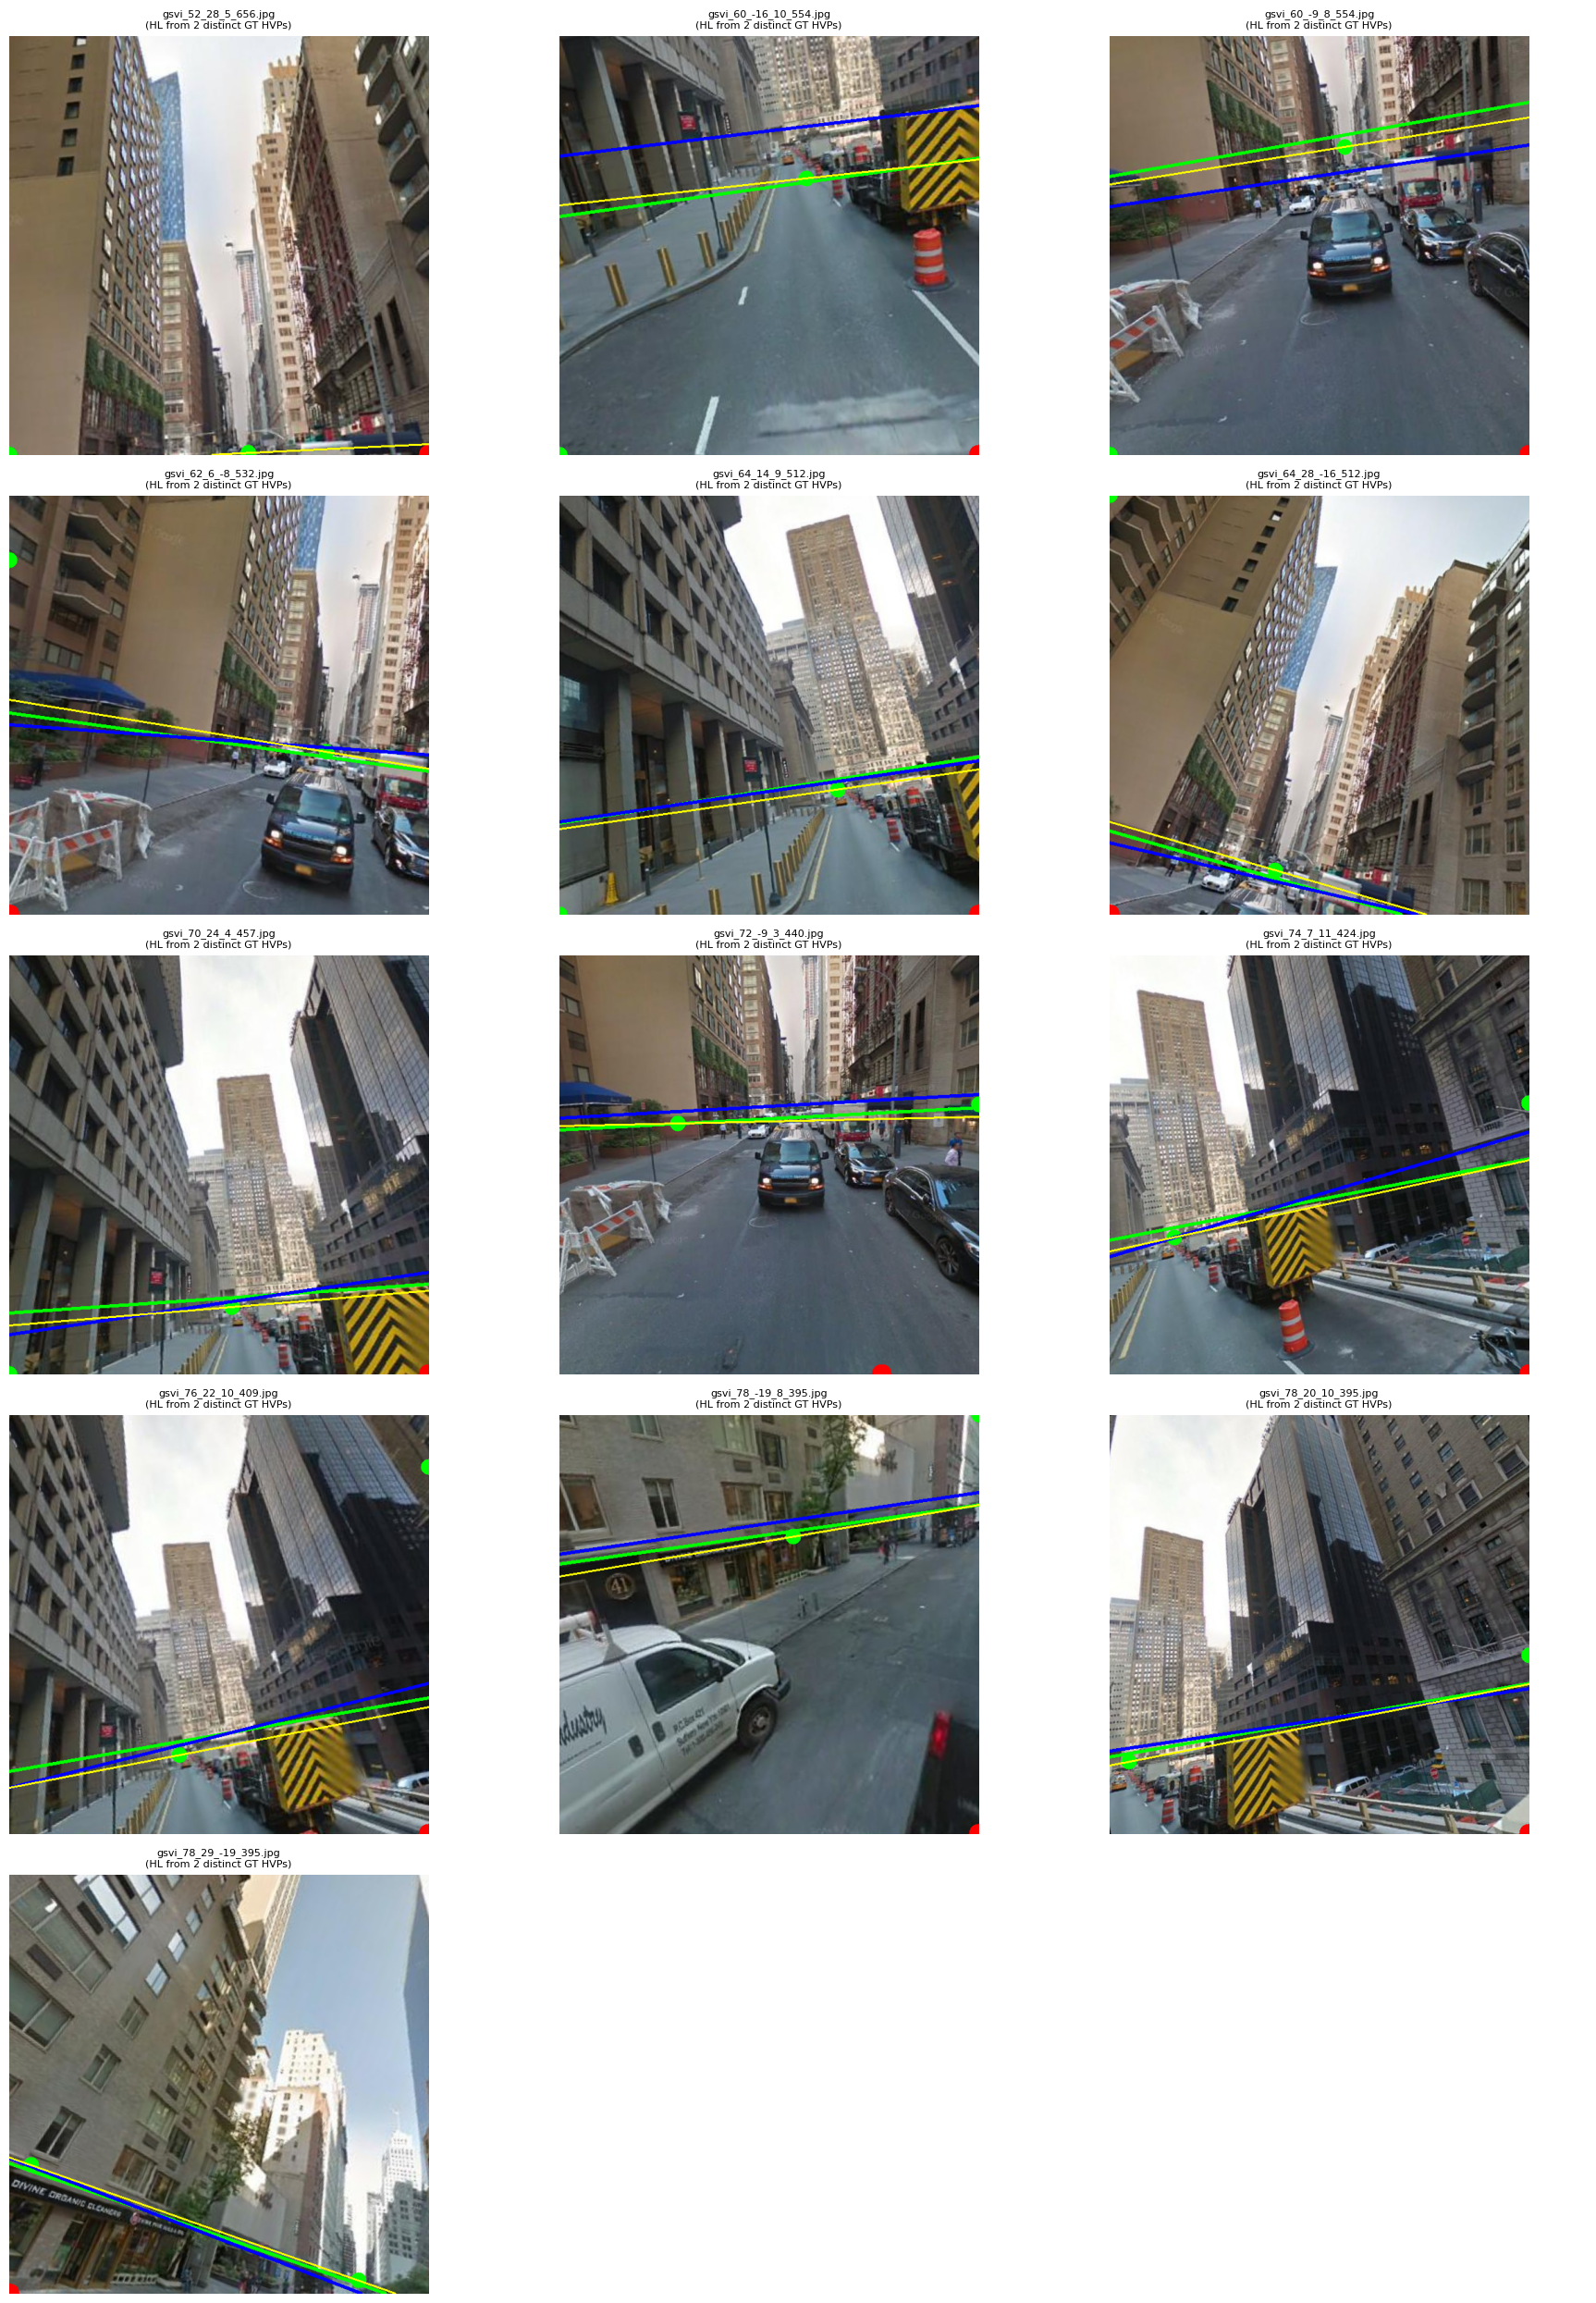

In [54]:
import os
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import torch.nn.functional as F
import sys
import glob
import inspect

try:
    import datasets.transforms as T
    from configs.sofi import sofi
except ImportError as e:
    print(f"Warning: Could not import custom modules 'datasets.transforms' or 'configs.sofi'. {e}")
    if 'T' not in globals():
        class DummyTransform:
            def __call__(self, image, extra, target): return image, extra, target
        class DummyCompose:
            def __init__(self, transforms): self.transforms = transforms
            def __call__(self, image, extra, target):
                for t in self.transforms: image, extra, target = t(image, extra, target)
                return image, extra, target
        T = type('module', (object,), {'ToTensor': DummyTransform, 'Normalize': DummyTransform, 'Compose': DummyCompose})()
    if 'sofi' not in globals():
        class DummyModel(torch.nn.Module):
            def __init__(self): super().__init__(); self.fc = torch.nn.Linear(1,1)
            def forward(self, x, e): return {'pred_hl': torch.rand(1,3), 'pred_zvp': torch.rand(1,3)}
        sofi = DummyModel()


###############################
# Helper Classes for Transforms
###############################
class ToTensorWrapper:
    def __call__(self, image, extra, target):
        image_tensor, extra_tensor, target_tensor = T.ToTensor()(image, extra, target)
        return image_tensor, extra_tensor, target_tensor

class NormalizeWrapper:
    def __init__(self, mean, std):
        self.normalize = T.Normalize(mean, std)
    def __call__(self, image, extra, target):
        image_norm, extra_norm = self.normalize(image, extra)
        return image_norm, extra_norm, target

class ComposeWrapper(T.Compose):
    def __call__(self, image, extra=None, target=None):
        if not hasattr(self, 'transforms'):
            return image, extra, target
        for t in self.transforms:
            image, extra, target = t(image, extra, target)
        return image, extra, target

def make_transform(imageset):
    transform = ComposeWrapper([
        ToTensorWrapper(),
        NormalizeWrapper([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    return transform

def eul2rotm_ypr(euler):
    euler = np.asarray(euler, dtype=np.float32)
    R_x = np.array([[1, 0, 0],
                    [0, np.cos(euler[0]), -np.sin(euler[0])],
                    [0, np.sin(euler[0]), np.cos(euler[0])]], dtype=np.float32)
    R_y = np.array([[ np.cos(euler[1]), 0, np.sin(euler[1])],
                    [0, 1, 0],
                    [-np.sin(euler[1]), 0, np.cos(euler[1])]], dtype=np.float32)
    R_z = np.array([[np.cos(euler[2]), -np.sin(euler[2]), 0],
                    [np.sin(euler[2]), np.cos(euler[2]), 0],
                    [0, 0, 1]], dtype=np.float32)
    return np.dot(R_z, np.dot(R_x, R_y))

###############################
# Data Loading and GT Parameter Extraction
###############################
def load_gt_for_visualization(image_path, line_row, args):
    target = {}
    try:
        image = cv2.imread(image_path)
        if image is None: return None
        image = image[:, :, ::-1]
    except Exception as e: return None

    org_image = image.copy()
    org_h, org_w = image.shape[0], image.shape[1]
    org_sz = np.array([org_h, org_w])
    pp = (org_w / 2.0, org_h / 2.0)
    rho = 2.0 / np.minimum(org_w, org_h)

    try:
        if len(line_row) < 10: return None

        gt_pitch = np.radians(float(line_row[3]))
        gt_roll  = np.radians(float(line_row[4]))
        org_focal_pixel = float(line_row[5])
        if org_focal_pixel <= 0: org_focal_pixel = 1.0
        gt_focal = rho * org_focal_pixel

        rotm = eul2rotm_ypr([gt_pitch, 0, gt_roll])
        rotm[1, :] = -rotm[1, :]
        gt_up_vector = rotm[:, 1].copy()

        gt_hl = gt_up_vector.copy()
        gt_hl[2] = gt_focal * gt_hl[2] # Horizon line vector scaled by focal

        gt_zvp = gt_up_vector.copy()
        if gt_zvp[2] < 0: gt_zvp = -gt_zvp # Ensure points "up"
        denom = np.clip(np.abs(gt_zvp[2]), 1e-5, None) # Avoid division by zero
        gt_zvp = gt_zvp / denom # Normalize direction vector
        gt_zvp = gt_focal * gt_zvp # Scale by focal length -> [x_norm_scaled, y_norm_scaled, z_norm_scaled]
        gt_zvp[2] = 1.0 # Set z=1 for normalized image plane representation

        hvp1_pixel = np.array([float(line_row[6]), float(line_row[7])], dtype=np.float32)
        hvp2_pixel = np.array([float(line_row[8]), float(line_row[9])], dtype=np.float32)
        target['gt_hvps_pixel'] = np.vstack([hvp1_pixel, hvp2_pixel])

        hvp1_norm_vec = np.array([hvp1_pixel[0], hvp1_pixel[1], 1.0], dtype=np.float32)
        hvp2_norm_vec = np.array([hvp2_pixel[0], hvp2_pixel[1], 1.0], dtype=np.float32)
        gt_hvps_norm = np.vstack([hvp1_norm_vec, hvp2_norm_vec])
        gt_hvps_norm[:, 0] = rho * (gt_hvps_norm[:, 0] - pp[0])
        gt_hvps_norm[:, 1] = rho * (gt_hvps_norm[:, 1] - pp[1])
        target['hvps_norm'] = gt_hvps_norm

    except Exception as e:
        print(f"Error reading GT info from CSV row for {os.path.basename(image_path)}: {e}")
        return None

    target['hl'] = gt_hl
    target['zvp'] = gt_zvp # This is the GT ZVP in [x_norm_scaled, y_norm_scaled, 1.0] format
    target['org_img'] = org_image
    target['org_sz'] = org_sz
    target['img_path'] = image_path
    target['gt_focal'] = gt_focal
    return target

###############################
# Placeholders and Args
###############################
class Args:
    input_width = 512
    input_height = 512

###############################
# Visualization Helpers
###############################
def convert_hl_to_coeffs(hl_vec, rho, pp):
    if hl_vec is None or hl_vec.shape != (3,): return np.array([0., 0., 0.])
    nx, ny, nz_f_norm = hl_vec
    a = nx * rho
    b = ny * rho
    c = nz_f_norm - a * pp[0] - b * pp[1]
    norm = np.sqrt(a**2 + b**2)
    if norm < 1e-9: return np.array([0., 0., 0.])
    return np.array([a, b, c]) / norm

def convert_zvp_to_coords(zvp_vec, rho, pp):
    # Expects zvp_vec in the format [x_norm_scaled, y_norm_scaled, ...]
    # Uses the first two components which are assumed to be scaled by focal length.
    if zvp_vec is None or zvp_vec.shape != (3,) or np.isnan(zvp_vec[:2]).any():
        return np.array([np.nan, np.nan])
    x_norm_scaled, y_norm_scaled, _ = zvp_vec # Ignore the z component
    if abs(rho) < 1e-9: return np.array([pp[0], pp[1]])
    # Invert the normalization: x = (x_norm_scaled / rho) + pp_x
    x = x_norm_scaled / rho + pp[0]
    y = y_norm_scaled / rho + pp[1]
    return np.array([x, y])

def convert_norm_line_to_pixel_coeffs(line_coeffs_norm, rho, pp):
    if line_coeffs_norm is None or line_coeffs_norm.shape != (3,): return np.array([0., 0., 0.])
    a_norm, b_norm, c_norm = line_coeffs_norm
    A = a_norm * rho
    B = b_norm * rho
    C = c_norm - A * pp[0] - B * pp[1]
    norm = np.sqrt(A**2 + B**2)
    if norm < 1e-9: return np.array([0., 0., 0.])
    return np.array([A, B, C]) / norm

def draw_line_from_coeffs(img, coeffs, color=(0, 255, 0), thickness=2):
    if coeffs is None or np.allclose(coeffs, 0): return img.copy()
    h, w = img.shape[:2]
    a, b, c = coeffs
    img_copy = img.copy()
    if abs(a) < 1e-6 and abs(b) < 1e-6: return img_copy

    if abs(b) < 1e-6:
        if abs(a) < 1e-6: return img_copy
        x_val = int(round(-c / a))
        pt1, pt2 = (x_val, 0), (x_val, h-1)
    elif abs(a) < 1e-6:
        if abs(b) < 1e-6: return img_copy
        y_val = int(round(-c / b))
        pt1, pt2 = (0, y_val), (w-1, y_val)
    else:
        y1 = (-c - a * 0) / b
        y2 = (-c - a * (w-1)) / b
        pt1, pt2 = (0, int(round(y1))), (w-1, int(round(y2)))
    clipped = cv2.clipLine((0, 0, w, h), pt1, pt2)
    if clipped[0]:
        p1_clip, p2_clip = tuple(map(int, clipped[1])), tuple(map(int, clipped[2]))
        cv2.line(img_copy, p1_clip, p2_clip, color, thickness)
    return img_copy

def draw_vanishing_point(img, vp_coords, color=(0, 0, 255), radius=10):
    if vp_coords is None or len(vp_coords) != 2 or np.isnan(vp_coords).any():
        return img.copy()
    x, y = int(round(vp_coords[0])), int(round(vp_coords[1]))
    h, w = img.shape[:2]
    x = np.clip(x, 0, w - 1)
    y = np.clip(y, 0, h - 1)
    return cv2.circle(img.copy(), (x, y), radius, color, -1)

###############################
# Main Visualization
###############################
if 'results' not in locals() or not isinstance(results, list) or not results:
    print("Error: 'results' list is empty or undefined.")
    sys.exit(1)

CSV_PATH = '/content/drive/MyDrive/gsv_train_20210313.csv'
IMAGE_DIR = '/content/drive/MyDrive/Subset'
ROW_INDICES_1_BASED = [85, 82, 883, 107, 864, 87, 889, 5484, 872, 860, 9437, 869, 78]
ROW_INDICES_0_BASED = [i - 1 for i in ROW_INDICES_1_BASED]

args = Args()

try:
    df = pd.read_csv(CSV_PATH, header=None)
except FileNotFoundError:
    print(f"Error: CSV file not found at {CSV_PATH}")
    sys.exit(1)
except Exception as e:
    print(f"Error reading CSV file: {e}")
    sys.exit(1)

try:
    filenames = [r['filename'] for r in results]
    outputs = [r['predictions'] for r in results]
    outputs = [{k: torch.from_numpy(v) if isinstance(v, np.ndarray) else v for k, v in pred.items()} for pred in outputs]
except (KeyError, TypeError):
     try:
         filenames = [r[0] for r in results]
         outputs = [r[1] for r in results]
     except (IndexError, TypeError):
        print("Error: 'results' structure is not as expected.")
        sys.exit(1)

n_images = len(filenames)
if len(ROW_INDICES_0_BASED) != n_images:
    print(f"Warning: Number of row indices ({len(ROW_INDICES_0_BASED)}) != number of results ({n_images}). Using first {n_images} indices.")
    ROW_INDICES_0_BASED = ROW_INDICES_0_BASED[:n_images]

n_cols = 3
n_rows = int(np.ceil(n_images / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
if n_images == 1: axes = np.array([axes])
axes = axes.flatten()

for i, img_file in enumerate(filenames):
    ax = axes[i]
    row_idx = ROW_INDICES_0_BASED[i]
    image_path = os.path.join(IMAGE_DIR, img_file)
    output_dict = outputs[i]

    if row_idx >= len(df):
        print(f"Error: Row index {row_idx} out of bounds for CSV. Skipping {img_file}.")
        ax.set_title(f"{img_file}\nRow Index Error", fontsize=8)
        ax.axis('off')
        continue

    line_row_series = df.iloc[row_idx]
    line_row = line_row_series.astype(str).tolist()

    gt_target = load_gt_for_visualization(image_path, line_row, args)
    if gt_target is None:
        print(f"Failed to load GT data for {img_file} (row {row_idx}).")
        ax.set_title(f"{img_file}\nGT Load Error", fontsize=8)
        ax.axis('off')
        continue

    img = gt_target['org_img'].copy()
    org_h, org_w = gt_target['org_sz']
    pp = (org_w / 2.0, org_h / 2.0)
    rho = 2.0 / np.minimum(org_w, org_h)

    gt_hl_vec = gt_target['hl']
    gt_hvps_pixel = gt_target['gt_hvps_pixel']
    gt_hl_coeffs = convert_hl_to_coeffs(gt_hl_vec, rho, pp)

    pred_hl_coeffs = np.array([0., 0., 0.])
    pred_zvp_coords = np.array([np.nan, np.nan])
    pred_zvp_vec_for_coords = np.array([np.nan, np.nan, np.nan]) # Initialize as NaN

    if 'pred_hl' in output_dict and 'pred_zvp' in output_dict:
        try:
            pred_hl_tensor = output_dict['pred_hl']
            pred_zvp_tensor = output_dict['pred_zvp']
            pred_hl_vec = pred_hl_tensor.cpu().numpy().squeeze() if isinstance(pred_hl_tensor, torch.Tensor) else np.array(pred_hl_tensor).squeeze()
            pred_zvp_vec_raw = pred_zvp_tensor.cpu().numpy().squeeze() if isinstance(pred_zvp_tensor, torch.Tensor) else np.array(pred_zvp_tensor).squeeze()

            if pred_hl_vec.shape == (3,):
                pred_hl_coeffs = convert_hl_to_coeffs(pred_hl_vec, rho, pp)

            # Process predicted ZVP vector
            if pred_zvp_vec_raw.shape == (3,):
                # Assume the model predicts ZVP in the same scaled format as GT: [x_norm_scaled, y_norm_scaled, z_maybe_scaled]
                pred_zvp_vec_processed = pred_zvp_vec_raw.copy()

                # Optional: Ensure ZVP points upwards (adjust based on model's definition)
                # if pred_zvp_vec_processed[2] < 0:
                #    pred_zvp_vec_processed = -pred_zvp_vec_processed

                # We directly use the first two components assuming they are x_norm_scaled, y_norm_scaled
                pred_zvp_vec_for_coords = pred_zvp_vec_processed

                # Convert the processed ZVP vector [x_norm_scaled, y_norm_scaled, ...] to pixel coordinates
                pred_zvp_coords = convert_zvp_to_coords(pred_zvp_vec_for_coords, rho, pp)
            else:
                pred_zvp_coords = np.array([np.nan, np.nan]) # Invalid shape

        except Exception as e:
            print(f"Error processing predicted HL/ZVP for {img_file}: {e}")
            pred_zvp_coords = np.array([np.nan, np.nan]) # Ensure it's NaN on error
    else:
        print(f"Warning: Missing 'pred_hl' or 'pred_zvp' in output for {img_file}.")


    hvp_method_note = ""
    hvp_hl_coeffs = np.array([0., 0., 0.])
    gt_hvps_norm = gt_target.get('hvps_norm')
    if gt_hvps_norm is not None and gt_hvps_norm.shape == (2, 3):
        if not np.allclose(gt_hvps_norm[0], gt_hvps_norm[1], atol=1e-4):
            vp1_h = gt_hvps_norm[0]
            vp2_h = gt_hvps_norm[1]
            if np.linalg.norm(vp1_h) > 1e-9 and np.linalg.norm(vp2_h) > 1e-9:
                vp1_h_norm = vp1_h / np.linalg.norm(vp1_h)
                vp2_h_norm = vp2_h / np.linalg.norm(vp2_h)
                line_coeffs_norm = np.cross(vp1_h_norm, vp2_h_norm)
                line_norm = np.linalg.norm(line_coeffs_norm)
                if line_norm > 1e-9:
                     line_coeffs_norm /= line_norm
                     hvp_hl_coeffs = convert_norm_line_to_pixel_coeffs(line_coeffs_norm, rho, pp)
                     hvp_method_note = "(HL from 2 distinct GT HVPs)"
                else:
                     hvp_method_note = "(HL from HVPs failed - zero cross product)"
            else:
                 hvp_method_note = "(HL from HVPs failed - zero vector)"
        else:
            hvp_method_note = "(HL from HVPs: VPs are identical)"
    else:
         hvp_method_note = "(HL from HVPs: Invalid/missing data)"


    img_vis = img.copy()
    img_vis = draw_line_from_coeffs(img_vis, gt_hl_coeffs, color=(0, 255, 0), thickness=3)
    if gt_hvps_pixel is not None and gt_hvps_pixel.shape == (2, 2):
        img_vis = draw_vanishing_point(img_vis, gt_hvps_pixel[0], color=(0, 255, 0), radius=12)
        img_vis = draw_vanishing_point(img_vis, gt_hvps_pixel[1], color=(0, 255, 0), radius=12)
    img_vis = draw_line_from_coeffs(img_vis, pred_hl_coeffs, color=(0, 0, 255), thickness=3)
    img_vis = draw_vanishing_point(img_vis, pred_zvp_coords, color=(255, 0, 0), radius=15) # Plot corrected coords
    img_vis = draw_line_from_coeffs(img_vis, hvp_hl_coeffs, color=(255, 255, 0), thickness=2)


    ax.imshow(img_vis)
    ax.set_title(f"{img_file}\n{hvp_method_note}", fontsize=8)
    ax.axis('off')

for j in range(n_images, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [32]:
import os
import torch
import cv2
import numpy as np
from PIL import Image
import pandas as pd
import datasets.transforms as T
from configs.sofi import sofi
import torch.nn.functional as F

class ToTensorWrapper:
    def __call__(self, image, extra, target):
        image, extra, target = T.ToTensor()(image, extra, target)
        return image, extra, target

class NormalizeWrapper:
    def __init__(self, mean, std):
        self.normalize = T.Normalize(mean, std)
    def __call__(self, image, extra, target):
        image, extra = self.normalize(image, extra)
        return image, extra, target

class ComposeWrapper(T.Compose):
    def __call__(self, image, extra=None, target=None):
        for t in self.transforms:
            image, extra, target = t(image, extra, target)
        return image, extra, target

def make_transform(imageset):
    transform = ComposeWrapper([
        ToTensorWrapper(),
        NormalizeWrapper([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    return transform

def eul2rotm_ypr(euler):
    R_x = np.array([[1, 0, 0],
                    [0, np.cos(euler[0]), -np.sin(euler[0])],
                    [0, np.sin(euler[0]), np.cos(euler[0])]], dtype=np.float32)
    R_y = np.array([[ np.cos(euler[1]), 0, np.sin(euler[1])],
                    [0, 1, 0],
                    [-np.sin(euler[1]), 0, np.cos(euler[1])]], dtype=np.float32)
    R_z = np.array([[np.cos(euler[2]), -np.sin(euler[2]), 0],
                    [np.sin(euler[2]), np.cos(euler[2]), 0],
                    [0, 0, 1]], dtype=np.float32)
    return np.dot(R_z, np.dot(R_x, R_y))

def load_image(image_path, line_row, args):
    target = {}
    image = cv2.imread(image_path)
    image = image[:, :, ::-1]
    org_image = image.copy()
    org_h, org_w = image.shape[0], image.shape[1]
    org_sz = np.array([org_h, org_w])
    image = cv2.resize(image, dsize=(args.input_width, args.input_height))
    input_sz = np.array([args.input_height, args.input_width])
    pp = (org_w / 2, org_h / 2)
    rho = 2.0 / np.minimum(org_w, org_h)

    # Use proper indexing for ground truth values.
    gt_pitch = np.radians(float(line_row[3]))
    gt_roll  = np.radians(float(line_row[4]))
    gt_focal = rho * float(line_row[5])
    gt_fovy  = 2.0 * np.arctan(float(org_h) / (2.0 * float(line_row[5])))

    # Compute rotation matrix using yaw, pitch and roll.
    rotm = eul2rotm_ypr([gt_pitch, 0, gt_roll])
    rotm[1, :] = -rotm[1, :]
    gt_up_vector = rotm[:, 1]
    gt_hl = gt_up_vector.copy()
    gt_hl[2] = gt_focal * gt_hl[2]
    gt_zvp = gt_up_vector.copy()
    if gt_zvp[2] < 0:
        gt_zvp = -gt_zvp
    gt_zvp = gt_zvp / np.maximum(gt_zvp[2], 1e-7)
    gt_zvp = gt_focal * gt_zvp
    gt_zvp[2] = 1.0
    gt_rp = np.array([gt_roll, gt_pitch])

    # Process horizontal vanishing points (always two vp's)
    gt_hvps = np.array([
        [float(line_row[6]), float(line_row[7]), 1.0],
        [float(line_row[8]), float(line_row[9]), 1.0]
    ], dtype=np.float32)

    gt_hvps[:, 0] = rho * (gt_hvps[:, 0] - pp[0])
    gt_hvps[:, 1] = rho * (gt_hvps[:, 1] - pp[1])

    image_tensor, _, _ = make_transform('test')(Image.fromarray(image), None, None)
    target['rp'] = torch.from_numpy(np.ascontiguousarray(gt_rp)).float()
    target['fovy'] = torch.tensor(gt_fovy).float()
    target['up_vector'] = torch.from_numpy(np.ascontiguousarray(gt_up_vector)).float()
    target['focal'] = torch.tensor(gt_focal).float()
    target['zvp'] = torch.from_numpy(np.ascontiguousarray(gt_zvp)).float()
    target['hl'] = torch.from_numpy(np.ascontiguousarray(gt_hl)).float()
    target['hvps'] = torch.from_numpy(np.ascontiguousarray(gt_hvps)).float()
    target['org_img'] = org_image
    target['org_sz'] = org_sz
    target['input_sz'] = input_sz
    target['img_path'] = image_path
    target['filename'] = image_path
    return image_tensor.unsqueeze(0).cuda(), target

class Args:
    input_width = 512
    input_height = 512
    masks = False

# (Criterion and loss functions remain defined here if needed later)
class SetCriterion(torch.nn.Module):
    def __init__(self, weight_dict, losses, line_pos_angle, line_neg_angle):
        super(SetCriterion, self).__init__()
        self.weight_dict = weight_dict
        self.losses = losses
        self.thresh_line_pos = torch.tensor(np.cos(np.radians(line_pos_angle)), dtype=torch.float32).cuda()
        self.thresh_line_neg = torch.tensor(np.cos(np.radians(line_neg_angle)), dtype=torch.float32).cuda()
    def loss_zvp(self, outputs, targets):
        src_zvp = outputs['pred_zvp']
        target_zvp = torch.stack([t['zvp'] for t in targets], dim=0)
        cos_sim = F.cosine_similarity(src_zvp, target_zvp, dim=-1).abs()
        loss = (1.0 - cos_sim).mean()
        return {'loss_zvp': loss}
    def loss_fovy(self, outputs, targets):
        src_fovy = outputs['pred_fovy']
        target_fovy = torch.stack([t['fovy'] for t in targets], dim=0)
        if src_fovy.dim() == 0:
            src_fovy = src_fovy.unsqueeze(0)
        loss = F.l1_loss(src_fovy, target_fovy)
        return {'loss_fovy': loss}
    def loss_hl(self, outputs, targets):
        src_hl = outputs['pred_hl']
        target_hl = torch.stack([t['hl'] for t in targets], dim=0)
        target_hl = F.normalize(target_hl, p=2, dim=-1)
        src_hl = F.normalize(src_hl, p=2, dim=-1)
        loss = F.l1_loss(src_hl, target_hl)
        return {'loss_hl': loss}
    def get_loss(self, loss, outputs, targets):
        loss_map = {'zvp': self.loss_zvp, 'fovy': self.loss_fovy, 'hl': self.loss_hl}
        return loss_map[loss](outputs, targets)
    def forward(self, outputs, targets):
        targets = [{k: v.to(outputs['pred_zvp'].device) if isinstance(v, torch.Tensor) else v for k, v in t.items()} for t in targets]
        losses = {}
        for loss in self.losses:
            losses.update(self.get_loss(loss, outputs, targets))
        return losses

# Define any required hyperparameters.
weight_dict = {'loss_zvp': 0.5, 'loss_fovy': 0.5, 'loss_hl': 0.5}
losses_list = ['zvp', 'fovy', 'hl']
line_pos_angle = 60
line_neg_angle = 30
criterion = SetCriterion(weight_dict, losses_list, line_pos_angle, line_neg_angle).to('cuda')

csv_path = '/content/drive/MyDrive/gsv_train_20210313.csv'
image_dir = '/content/drive/MyDrive/subset2'
indices = [1300, 7396, 1254, 2431]

df = pd.read_csv(csv_path, header=None)
image_list = sorted([f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png'))])
args = Args()

checkpoint = torch.load('/content/drive/MyDrive/sofi.pth', map_location='cpu')
model = sofi
model.load_state_dict(checkpoint['model'], strict=True)
model = model.to('cuda')
model.eval()

results = []
for img_file, idx in zip(image_list, indices):
    line_row = df.iloc[idx].tolist()
    try:
        image_path = os.path.join(image_dir, img_file)
        image_tensor, gt_target = load_image(image_path, line_row, args)
        dummy_extra = {'lines': torch.zeros((1, 512, 3), device='cuda'),
                       'line_mask': torch.ones((1, 512, 1), device='cuda'),
                       'segs': torch.zeros((1, 512, 4), device='cuda')}
        with torch.no_grad():
            output = model(image_tensor, dummy_extra)
        # Instead of computing losses, we store the raw model predictions.
        results.append((img_file, output))
    except Exception as e:
        print(f"Error processing index {idx} with image {img_file}. Row content: {line_row}")
        print("Error:", e)

# print(results)


CSV file loaded successfully for GT lookup from /content/drive/MyDrive/gsv_train_20210313.csv. Shape: (12679, 10)


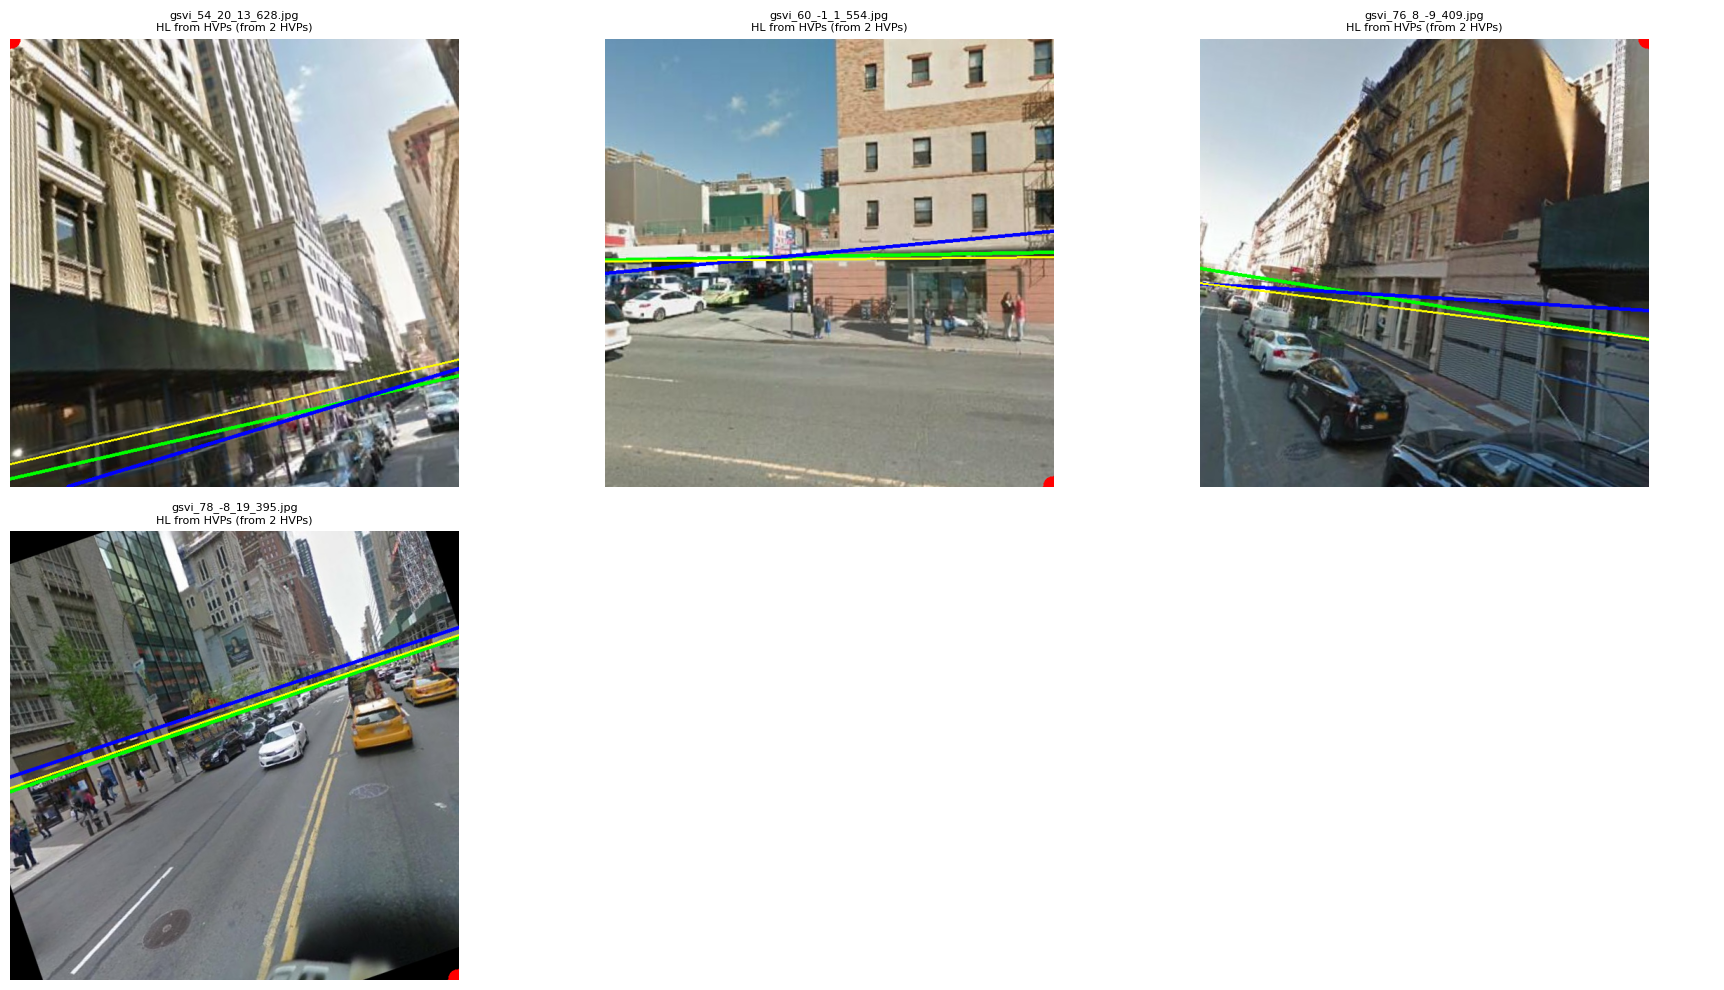

In [33]:
import os
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import torch.nn.functional as F
import sys
import glob
import inspect
import traceback

# --- Ensure necessary modules can be imported ---
try:
    import datasets.transforms as T
    from configs.sofi import sofi
except ImportError as e:
    print(f"Error importing necessary modules: {e}")
    print("Please ensure 'datasets/transforms.py' and 'configs/sofi.py' are accessible.")
    sys.exit(1)


# --- Helper Classes for Transforms (Potentially unused if loading separately) ---
class ToTensorWrapper:
    def __call__(self, image, extra, target):
        image_tensor, extra_tensor, target_tensor = T.ToTensor()(image, extra, target)
        return image_tensor, extra_tensor, target_tensor

class NormalizeWrapper:
    def __init__(self, mean, std):
        self.normalize = T.Normalize(mean, std)
    def __call__(self, image, extra, target):
        image_norm, extra_norm = self.normalize(image, extra)
        return image_norm, extra_norm, target

if 'T' not in globals():
     print("Error: datasets.transforms (T) failed to import. Cannot define ComposeWrapper.")
     sys.exit(1)

class ComposeWrapper(T.Compose):
    def __call__(self, image, extra=None, target=None):
        if not hasattr(self, 'transforms'):
             print("Error: ComposeWrapper initialized without transforms list.")
             return image, extra, target
        for t in self.transforms:
            image, extra, target = t(image, extra, target)
        return image, extra, target

def make_transform(imageset):
    transform = ComposeWrapper([
        ToTensorWrapper(),
        NormalizeWrapper([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    return transform

# --- Geometric Helper Functions ---
def eul2rotm_ypr(euler):
    euler = np.asarray(euler, dtype=np.float32)
    R_x = np.array([[1, 0, 0],
                    [0, np.cos(euler[0]), -np.sin(euler[0])],
                    [0, np.sin(euler[0]), np.cos(euler[0])]], dtype=np.float32)
    R_y = np.array([[ np.cos(euler[1]), 0, np.sin(euler[1])],
                    [0, 1, 0],
                    [-np.sin(euler[1]), 0, np.cos(euler[1])]], dtype=np.float32)
    R_z = np.array([[np.cos(euler[2]), -np.sin(euler[2]), 0],
                    [np.sin(euler[2]), np.cos(euler[2]), 0],
                    [0, 0, 1]], dtype=np.float32)
    return np.dot(R_z, np.dot(R_x, R_y))

# --- GT Loading Function CORRECTED TO MATCH SOURCE SNIPPET ---
def load_gt_for_visualization(image_path, line_row, args):
    target = {}
    img_basename = os.path.basename(image_path)
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Image not found or could not be read: {image_path}")
            return None
        image = image[:, :, ::-1] # BGR to RGB
    except Exception as e:
        print(f"Error reading image {image_path}: {e}")
        return None

    org_image = image.copy()
    org_h, org_w = image.shape[0], image.shape[1]
    org_sz = np.array([org_h, org_w])
    pp = (org_w / 2.0, org_h / 2.0)
    rho = 2.0 / np.minimum(org_w, org_h)

    try:
        if len(line_row) <= 9:
             raise IndexError(f"Row has only {len(line_row)} columns, needs at least 10 (up to HVP2_y at index 9)")

        gt_pitch = np.radians(float(line_row[3])) # Index 3
        gt_roll = np.radians(float(line_row[4]))  # Index 4
        org_focal_pixel = float(line_row[5])     # Index 5
        if org_focal_pixel <= 0: org_focal_pixel = 1.0
        gt_focal_normalized = rho * org_focal_pixel

        rotm = eul2rotm_ypr([gt_pitch, 0, gt_roll])
        rotm[1, :] = -rotm[1, :]
        gt_up_vector = rotm[:, 1].copy()
        gt_hl = gt_up_vector.copy()
        gt_hl[2] = gt_focal_normalized * gt_hl[2]

        gt_zvp = gt_up_vector.copy()
        if gt_zvp[2] < 0: gt_zvp = -gt_zvp
        gt_zvp = gt_zvp / np.maximum(np.abs(gt_zvp[2]), 1e-7)
        gt_zvp = gt_focal_normalized * gt_zvp

        raw_hvp1_coords = None
        raw_hvp2_coords = None
        gt_hvps = None

        try:
            hvp1_x = float(line_row[6]) # Index 6
            hvp1_y = float(line_row[7]) # Index 7
            raw_hvp1_coords = [hvp1_x, hvp1_y]
            hvp1 = np.array([hvp1_x, hvp1_y, 1.0], dtype=np.float32)
        except (ValueError, IndexError) as e:
            print(f"[{img_basename}] Error reading required HVP1 coords (cols 6, 7): {e}")
            return None

        try:
            hvp2_x = float(line_row[8]) # Index 8
            hvp2_y = float(line_row[9]) # Index 9
            raw_hvp2_coords = [hvp2_x, hvp2_y]
            hvp2 = np.array([hvp2_x, hvp2_y, 1.0], dtype=np.float32)

            # Assume distinct HVPs based on user confirmation for these indices
            gt_hvps = np.vstack([hvp1, hvp2])

        except (ValueError, IndexError) as e:
             # This case should ideally not happen if CSV is well-formed and has 10+ columns
             print(f"[{img_basename}] Error reading HVP2 (cols 8, 9): {e}. Using only HVP1.")
             raw_hvp2_coords = 'Error Parsing'
             gt_hvps = np.vstack([hvp1, hvp1]) # Fallback

        gt_hvps_norm = gt_hvps.copy()
        gt_hvps_norm[:, 0] = rho * (gt_hvps_norm[:, 0] - pp[0])
        gt_hvps_norm[:, 1] = rho * (gt_hvps_norm[:, 1] - pp[1])
        gt_hvps_norm[:, 2] = 1.0

    except IndexError as e: print(f"[{img_basename}] Error accessing required GT index (likely 3, 4, 5): {e}"); return None
    except ValueError as e: print(f"[{img_basename}] Error converting GT data (likely pitch/roll/focal): {e}"); return None
    except Exception as e: print(f"[{img_basename}] Error calculating base GT: {e}"); traceback.print_exc(); return None

    target['hl'] = gt_hl
    target['zvp'] = gt_zvp
    target['hvps'] = gt_hvps_norm
    target['org_img'] = org_image
    target['org_sz'] = org_sz
    target['img_path'] = image_path
    target['gt_focal_normalized'] = gt_focal_normalized
    target['rho'] = rho
    target['pp'] = pp
    target['raw_hvp1'] = raw_hvp1_coords
    target['raw_hvp2'] = raw_hvp2_coords

    return target

# --- Args Class ---
class Args:
    input_width = 512
    input_height = 512

# --- Criterion Class (Assumed Correct, Not directly used in viz) ---
class SetCriterion(torch.nn.Module):
    def __init__(self, weight_dict, losses):
        super(SetCriterion, self).__init__()
        self.weight_dict = weight_dict
        self.losses = losses

    def loss_zvp(self, outputs, targets):
        target_device = targets[0].get('zvp', torch.tensor([])).device
        if 'pred_zvp' not in outputs: return {'loss_zvp': torch.tensor(0.0, device=target_device)}
        src_zvp = outputs['pred_zvp']
        try: target_zvp = torch.stack([t['zvp'] for t in targets], dim=0)
        except KeyError: return {'loss_zvp': torch.tensor(0.0, device=target_device)}
        src_zvp = F.normalize(src_zvp, p=2, dim=-1); target_zvp = F.normalize(target_zvp, p=2, dim=-1)
        cos_sim = F.cosine_similarity(src_zvp, target_zvp, dim=-1).abs()
        cos_sim = torch.clamp(cos_sim, -1.0 + 1e-7, 1.0 - 1e-7); loss = (1.0 - cos_sim).mean()
        return {'loss_zvp': loss}

    def loss_fovy(self, outputs, targets):
        target_device = targets[0].get('fovy', torch.tensor([])).device
        if 'pred_fovy' not in outputs: return {'loss_fovy': torch.tensor(0.0, device=target_device)}
        src_fovy = outputs['pred_fovy']
        try: target_fovy = torch.stack([t['fovy'] for t in targets], dim=0)
        except KeyError: return {'loss_fovy': torch.tensor(0.0, device=target_device)}
        if src_fovy.dim() == 0: src_fovy = src_fovy.unsqueeze(0)
        loss = F.l1_loss(src_fovy, target_fovy); return {'loss_fovy': loss}

    def loss_hl(self, outputs, targets):
        target_device = targets[0].get('hl', torch.tensor([])).device
        if 'pred_hl' not in outputs: return {'loss_hl': torch.tensor(0.0, device=target_device)}
        src_hl = outputs['pred_hl']
        try: target_hl = torch.stack([t['hl'] for t in targets], dim=0)
        except KeyError: return {'loss_hl': torch.tensor(0.0, device=target_device)}
        target_hl = F.normalize(target_hl, p=2, dim=-1); src_hl = F.normalize(src_hl, p=2, dim=-1)
        cos_sim = F.cosine_similarity(src_hl, target_hl, dim=-1).abs()
        cos_sim = torch.clamp(cos_sim, -1.0 + 1e-7, 1.0 - 1e-7); loss = (1.0 - cos_sim).mean()
        return {'loss_hl': loss}

    def get_loss(self, loss, outputs, targets):
        loss_map = {'zvp': self.loss_zvp, 'fovy': self.loss_fovy, 'hl': self.loss_hl}
        if loss not in loss_map: raise ValueError(f"Unknown loss type: {loss}")
        return loss_map[loss](outputs, targets)

    def forward(self, outputs, targets):
        if not outputs: return {}
        try: output_device = next(v.device for v in outputs.values() if isinstance(v, torch.Tensor))
        except StopIteration: output_device = torch.device("cpu")
        try: targets_on_device = [{k: v.to(output_device) if isinstance(v, torch.Tensor) else v for k, v in t.items()} for t in targets]
        except Exception as e: print(f"Error moving targets to device {output_device}: {e}"); return {}
        losses = {}
        for loss in self.losses:
            try: losses.update(self.get_loss(loss, outputs, targets_on_device))
            except Exception as e: print(f"Error calculating loss '{loss}': {e}"); losses[loss] = torch.tensor(float('nan'), device=output_device)
        return losses

# --- Pre-computed Results Check ---
if 'results' not in locals() or not isinstance(results, list) or not results:
     print("Error: The 'results' list with pre-computed predictions was not found or is empty.")
     print("Please ensure the prediction part of the script ran successfully and populated the 'results' list, or load it from a file.")
     sys.exit(1)

# --- Configuration for Visualization ---
CSV_PATH = '/content/drive/MyDrive/gsv_train_20210313.csv'
IMAGE_DIR = '/content/drive/MyDrive/subset2'
ROW_INDICES_1_BASED = [1300, 7396, 1254, 2431]
ROW_INDICES_0_BASED = [i - 1 for i in ROW_INDICES_1_BASED]

args = Args()

# --- Load CSV for GT lookup ---
try:
    df = pd.read_csv(CSV_PATH, header=None, dtype=str, keep_default_na=False)
    print(f"CSV file loaded successfully for GT lookup from {CSV_PATH}. Shape: {df.shape}")
except FileNotFoundError: print(f"Error: CSV file not found at {CSV_PATH}"); sys.exit(1)
except Exception as e: print(f"Error reading CSV file: {e}"); sys.exit(1)

# --- Conversion and Drawing Functions (Assume Correct) ---
def convert_hl_to_coeffs(hl_vec, rho, pp):
    nx, ny, nz_f_norm = hl_vec
    a = nx * rho
    b = ny * rho
    c = nz_f_norm - a * pp[0] - b * pp[1]
    norm = np.sqrt(a**2 + b**2)
    if norm < 1e-9: return np.array([0., 0., 0.])
    return np.array([a, b, c]) / norm

def convert_zvp_to_coords(zvp_vec_scaled, rho, pp):
    x_norm_scaled, y_norm_scaled, _ = zvp_vec_scaled
    if abs(rho) < 1e-9: return np.array([pp[0], pp[1]])
    x = x_norm_scaled / rho + pp[0]
    y = y_norm_scaled / rho + pp[1]
    return np.array([x, y])

def convert_hvp_norm_to_pixel(hvp_norm, rho, pp):
    x_norm, y_norm, _ = hvp_norm
    if abs(rho) < 1e-9: return np.array([pp[0], pp[1]])
    x = x_norm / rho + pp[0]
    y = y_norm / rho + pp[1]
    return np.array([x,y])

def convert_norm_line_to_pixel_coeffs(line_coeffs_norm, rho, pp):
    a_norm, b_norm, c_norm = line_coeffs_norm
    A = a_norm * rho
    B = b_norm * rho
    C = c_norm - A * pp[0] - B * pp[1]
    norm = np.sqrt(A**2 + B**2)
    if norm < 1e-9: return np.array([0., 0., 0.])
    return np.array([A, B, C]) / norm

def draw_line_from_coeffs(img, coeffs, color=(0, 255, 0), thickness=2):
    h, w = img.shape[:2]
    a, b, c = coeffs
    img_copy = img.copy()
    if abs(b) < 1e-6:
        if abs(a) < 1e-6: return img_copy
        x_val = int(round(-c / a))
        pt1, pt2 = (x_val, 0), (x_val, h-1)
    elif abs(a) < 1e-6:
        y_val = int(round(-c / b))
        pt1, pt2 = (0, y_val), (w-1, y_val)
    else:
        y1 = (-c - a * 0) / b
        y2 = (-c - a * (w-1)) / b
        pt1, pt2 = (0, int(round(y1))), (w-1, int(round(y2)))

    clipped = cv2.clipLine((0, 0, w, h), pt1, pt2)
    if clipped[0]:
        p1_clip, p2_clip = tuple(map(int, clipped[1])), tuple(map(int, clipped[2]))
        cv2.line(img_copy, p1_clip, p2_clip, color, thickness)
    return img_copy

def draw_vanishing_point(img, vp_coords, color=(0, 0, 255), radius=10):
    if vp_coords is None or len(vp_coords) != 2 or np.isnan(vp_coords).any() or np.isinf(vp_coords).any():
        return img.copy()
    x, y = int(round(vp_coords[0])), int(round(vp_coords[1]))
    h, w = img.shape[:2]
    x = np.clip(x, 0, w - 1)
    y = np.clip(y, 0, h - 1)
    return cv2.circle(img.copy(), (x, y), radius, color, -1)

# --- Visualization Grid ---
n_images = len(results)
if n_images == 0:
    print("No pre-computed results found to visualize.")
else:
    n_cols = 3
    n_rows = int(np.ceil(n_images / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
    if n_images == 1: axes = np.array([axes])
    axes = axes.flatten()

    if len(ROW_INDICES_0_BASED) != n_images:
         print(f"Error: Number of indices ({len(ROW_INDICES_0_BASED)}) does not match number of results ({n_images}). Cannot proceed.")
         sys.exit(1)

    for i, result_item in enumerate(results):
        ax = axes[i]

        if isinstance(result_item, (tuple, list)) and len(result_item) == 2:
            img_file = result_item[0]
            output = result_item[1]
        elif isinstance(result_item, dict) and 'filename' in result_item and 'output' in result_item:
            img_file = result_item['filename']
            output = result_item['output']
        else:
            ax.axis('off'); continue

        row_idx = ROW_INDICES_0_BASED[i]
        image_path = os.path.join(IMAGE_DIR, img_file)

        try:
            line_row_series = df.iloc[row_idx]
            line_row = line_row_series.tolist()
        except IndexError: print(f"Error: Row index {row_idx} out of bounds for GT lookup. Skipping viz for {img_file}."); ax.axis('off'); continue
        except Exception as e: print(f"Error accessing row {row_idx} for GT lookup: {e}. Skipping viz for {img_file}."); ax.axis('off'); continue

        gt_target = load_gt_for_visualization(image_path, line_row, args)
        if gt_target is None:
            print(f"Failed to load GT data for visualization of {img_file}. Skipping."); ax.axis('off'); continue

        img = gt_target['org_img'].copy()
        org_h, org_w = gt_target['org_sz']
        pp = gt_target['pp']
        rho = gt_target['rho']
        gt_focal_normalized = gt_target['gt_focal_normalized']

        gt_hl_vec = gt_target['hl']
        gt_zvp_vec_scaled = gt_target['zvp']
        gt_hl_coeffs = convert_hl_to_coeffs(gt_hl_vec, rho, pp)
        gt_zvp_coords = convert_zvp_to_coords(gt_zvp_vec_scaled, rho, pp)

        pred_hl_coeffs = np.array([0.,0.,0.])
        pred_zvp_coords = np.array([np.nan, np.nan])

        if 'pred_hl' in output and 'pred_zvp' in output:
            try:
                pred_hl_tensor = output['pred_hl']
                pred_hl_vec = pred_hl_tensor.cpu().numpy().squeeze()
                if pred_hl_vec.shape == (3,):
                    pred_hl_coeffs = convert_hl_to_coeffs(pred_hl_vec, rho, pp)

                pred_zvp_tensor = output['pred_zvp']
                pred_zvp_vec = pred_zvp_tensor.cpu().numpy().squeeze()
                if pred_zvp_vec.shape == (3,):
                    pred_z_comp = pred_zvp_vec[2]
                    if abs(pred_z_comp) < 1e-7:
                        pred_zvp_coords = np.array([np.nan, np.nan])
                    else:
                        pred_zvp_vec_norm_z1 = pred_zvp_vec / pred_z_comp
                        pred_zvp_vec_scaled = gt_focal_normalized * pred_zvp_vec_norm_z1
                        pred_zvp_coords = convert_zvp_to_coords(pred_zvp_vec_scaled, rho, pp)

            except Exception as e:
                print(f"Error processing stored predictions for {img_file}: {e}")

        hvp_hl_coeffs = np.array([0.,0.,0.])
        gt_hvps_norm = gt_target['hvps']
        hvp_method_note = " (HVP Error/Invalid)" # Default error note

        # Simplified HVP HL calculation assuming 2 distinct HVPs for these indices
        if gt_hvps_norm.shape == (2, 3):
            hvp1_norm = gt_hvps_norm[0]
            hvp2_norm = gt_hvps_norm[1]

            # Direct check for distinctness (redundant now but safe)
            if not np.allclose(hvp1_norm, hvp2_norm, atol=1e-5):
                vp1_h_norm_vec = hvp1_norm; vp2_h_norm_vec = hvp2_norm
                norm1 = np.linalg.norm(vp1_h_norm_vec); norm2 = np.linalg.norm(vp2_h_norm_vec)
                if norm1 > 1e-9 and norm2 > 1e-9:
                     vp1_h_norm_vec = vp1_h_norm_vec / norm1; vp2_h_norm_vec = vp2_h_norm_vec / norm2
                     line_coeffs_norm = np.cross(vp1_h_norm_vec, vp2_h_norm_vec)
                     hvp_hl_coeffs = convert_norm_line_to_pixel_coeffs(line_coeffs_norm, rho, pp)
                     hvp_method_note = f" (from 2 HVPs)"
                else:
                    hvp_method_note = " (HVP norm too small)"
            else:
                # This block should ideally not be reached for the specified indices
                # If it is, it means the VPs were duplicated during loading despite having 10 columns
                hvp_method_note = " (HVPs loaded as identical)"
                # Optionally, calculate using 1 HVP + ZVP as fallback
                hvp1_pixel = convert_hvp_norm_to_pixel(hvp1_norm, rho, pp)
                if not np.isnan(gt_zvp_coords).any():
                    zvp_pixel = gt_zvp_coords
                    zvp_dir_x = zvp_pixel[0] - pp[0]; zvp_dir_y = zvp_pixel[1] - pp[1]
                    if np.sqrt(zvp_dir_x**2 + zvp_dir_y**2) < 1e-6:
                         hvp_method_note += ", ZVP near center"
                    else:
                        hl_dir_x = -zvp_dir_y; hl_dir_y = zvp_dir_x
                        A = hl_dir_y; B = -hl_dir_x
                        C = - (A * hvp1_pixel[0] + B * hvp1_pixel[1])
                        norm = np.sqrt(A**2 + B**2)
                        if norm > 1e-9: hvp_hl_coeffs = np.array([A, B, C]) / norm
                        hvp_method_note += ", fallback 1HVP+ZVP"
                else:
                    hvp_method_note += ", GT ZVP invalid"

        # --- Drawing ---
        img_vis = img
        img_vis = draw_line_from_coeffs(img_vis, gt_hl_coeffs, color=(0, 255, 0), thickness=3)    # Green GT HL
        img_vis = draw_vanishing_point(img_vis, gt_zvp_coords, color=(0, 255, 0), radius=12)   # Green GT ZVP
        img_vis = draw_line_from_coeffs(img_vis, pred_hl_coeffs, color=(0, 0, 255), thickness=3)  # Blue Pred HL
        img_vis = draw_vanishing_point(img_vis, pred_zvp_coords, color=(255, 0, 0), radius=15)   # Red Pred ZVP
        img_vis = draw_line_from_coeffs(img_vis, hvp_hl_coeffs, color=(255, 255, 0), thickness=2) # Yellow HVP HL

        ax.imshow(img_vis)
        ax.set_title(f"{img_file}\nHL from HVPs{hvp_method_note}", fontsize=8)
        ax.axis('off')

    # --- Final Touches ---
    for j in range(n_images, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()